Number of instances = 699
Number of attributes = 10
Clump Thickness: 0
Uniformity of Cell Size: 0
Uniformity of Cell Shape: 0
Marginal Adhesion: 0
Single Epithelial Cell Size: 0
Bare Nuclei: 16
Bland Chromatin: 0
Normal Nucleoli: 0
Mitoses: 0
Class: 0
Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object
Number of rows in original data = 699
Number of rows after discarding missing values = 683


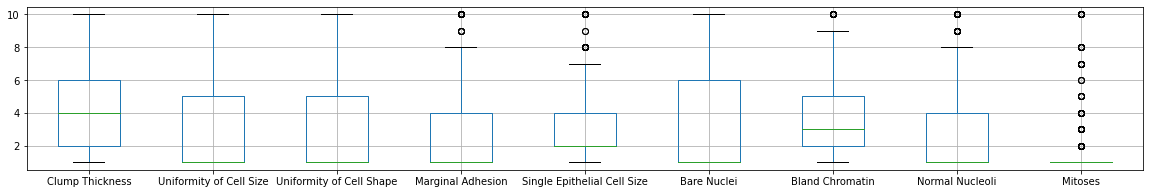

    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20         0.917080                -0.044070                 -0.406284   
21         1.982519                 0.611354                  0.603167   
22        -0.503505                -0.699494                 -0.742767   
23         1.272227                 0.283642                  0.603167   
24        -1.213798                -0.699494                 -0.742767   

    Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
20           2.519152                     0.805662     1.771569   
21           0.067638                     1.257272     0.948266   
22          -0.632794                    -0.549168    -0.698341   
23          -0.632794                    -0.549168          NaN   
24          -0.632794                    -0.549168    -0.698341   

    Bland Chromatin  Normal Nucleoli   Mitoses  
20         0.640688         0.371049  1.405526  
21         1.460910         2.335921 -0.343666  
22   

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)

#! Missing Data in the dataset are represented by "?", so we change it to NaN
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

for col in data.columns:
    print(f"{col}: {data[col].isna().sum()}")


#! editing column "Bare Nuclei"

data2 = data['Bare Nuclei']
print('Before replacing missing values:')
print(data2[20:25])

data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

#! Discarding records with dataset

print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()

print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

#! Outliners

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))
plt.show()

Z = (data2-data2.mean())/data2.std()
print(Z[20:25])

print('\nNumber of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

#! Duplicate Data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

